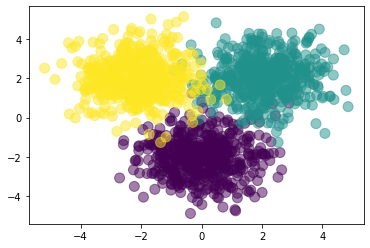

cost: -1609.3643068320807 classification_rate: 0.6306666666666667
cost: -156.40290144849698 classification_rate: 0.9713333333333334
cost: -137.94589903770503 classification_rate: 0.9733333333333334
cost: -131.6493919911333 classification_rate: 0.974
cost: -127.92699895618387 classification_rate: 0.974
cost: -125.30519797065189 classification_rate: 0.974
cost: -123.40793863531762 classification_rate: 0.9733333333333334
cost: -122.03659814034799 classification_rate: 0.974
cost: -121.0286031148689 classification_rate: 0.974
cost: -120.26338296755168 classification_rate: 0.974


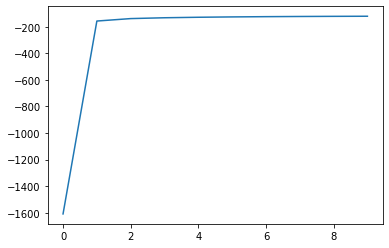

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(1)

def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1)) #hidden layer
    #print("Z",Z)
    A = Z.dot(W2) + b2 #output layer
    #print("A",A)
    expA = np.exp(A)
    #print("expA",expA)
    Y = expA / expA.sum(axis=1, keepdims=True) #probabilities 
    return Y, Z 


# determine the classification rate
# num correct / num total
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

# Z = Hidden ,T= targets , Y = predictions(probabilities)
#Hidden to output layer derivative of weights
def derivative_w2(Z, T, Y):
    N, K = T.shape
    M = Z.shape[1] # H is (N, M)
    #print("M",M)

    ret4 = Z.T.dot(T - Y)
    return ret4




# T= targets ,Y= predictions
#hidden to output bias
def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)




# input to Hidden Layer derivative of weights
def derivative_w1(X, Z, T, Y, W2):
    N, D = X.shape
    M, K = W2.shape

    
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    ret2 = X.T.dot(dZ)
    return ret2



# input to hidden layer bias
def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)


#categorical-cross-entropy
def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()


def main():
    # create the data
    Nclass = 500
    D = 2 # dimensionality of input
    M = 3 # hidden layer size
    K = 3 # number of classes

    X1 = np.random.randn(Nclass, D) + np.array([0, -2])
    X2 = np.random.randn(Nclass, D) + np.array([2, 2])
    X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
    X = np.vstack([X1, X2, X3])

    Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
    #print("Y",Y)
    N = len(Y) #1500
    # turn Y into an indicator matrix for training
    T = np.zeros((N, K)) #1500,3
    #print("T",T)
    for i in range(N):
        T[i, Y[i]] = 1

    # visulalisation
    plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
    plt.show()

    # randomly initialize weights
    W1 = np.random.randn(D, M)  # [2,3]matrix
    b1 = np.random.randn(M) # 3 
    W2 = np.random.randn(M, K) #[3,3]matrix
    b2 = np.random.randn(K) #3
    #print("initial w1",W1)
    #print("initial b1",b1)
    #print("initial w2",W2)
    #print("initial b2",b2)

    learning_rate = 1e-3 #0.001
    costs = []
    for epoch in range(1000):
        output, hidden = forward(X, W1, b1, W2, b2)
        if epoch % 100 == 0:
            c = cost(T, output)
            P = np.argmax(output, axis=1)# returns 1 value for high index value in a row
            r = classification_rate(Y, P)
            print("cost:", c, "classification_rate:", r)
            costs.append(c)

        # this is gradient ASCENT, not DESCENT
        # be comfortable with both!
        # oldW2 = W2.copy()
        W2 += learning_rate * derivative_w2(hidden, T, output)
        b2 += learning_rate * derivative_b2(T, output)
        W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
        b1 += learning_rate * derivative_b1(T, output, W2, hidden)

    plt.plot(costs)
    plt.show()


if __name__ == '__main__':
    main()
